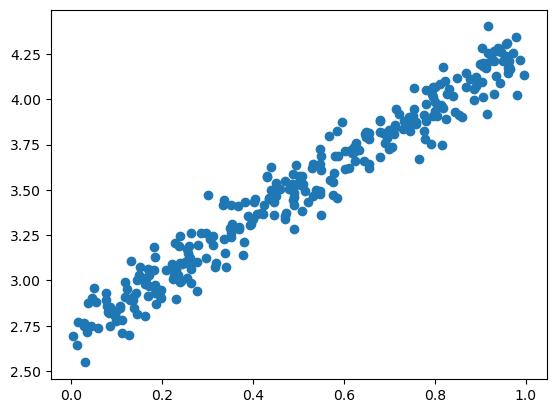

In [60]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load .mat file
# For part a use 'data/points2D_Set1.mat'
file = h5py.File('D:/IIT/SOC/Week_4/points2D_Set1.mat', 'r')

# Plot to show how points are scattered
X=file['x']
Y=file['y']
plt.scatter(X,Y)
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt

m = np.mean(X)
n = np.mean(Y)
print(m,n)

0.4999641865601916 3.500428385621437


In [62]:
X_error = X - m
Y_error = Y - n
print (X_error,Y_error)

[[ 3.14759500e-01  4.05827751e-01 -3.72977370e-01  4.13411670e-01
   1.32395060e-01 -4.02423782e-01 -2.21465968e-01  4.69173326e-02
   4.57542649e-01  4.64924349e-01 -3.42351105e-01  4.70628595e-01
   4.57202762e-01 -1.45885378e-02  3.00316282e-01 -3.58077848e-01
  -7.82029039e-02  4.15771339e-01  2.92243143e-01  4.59528240e-01
   1.55776513e-01 -4.64252508e-01  3.49165119e-01  4.34029061e-01
   1.78770968e-01  2.57775944e-01  2.43168282e-01 -1.07737167e-01
   1.55513704e-01 -3.28777499e-01  2.06081901e-01 -4.68131340e-01
  -2.23041202e-01 -4.53792796e-01 -4.02832405e-01  3.23493642e-01
   1.94864436e-01 -1.82864706e-01  4.50257862e-01 -4.65518106e-01
  -6.12198269e-02 -1.18405729e-01  2.65552602e-01  2.95235715e-01
  -3.13091582e-01 -1.01997908e-02 -5.43779858e-02  1.46348824e-01
   2.09400644e-01  2.54722495e-01 -2.23939110e-01  1.79738490e-01
   1.55133817e-01 -3.37352451e-01 -3.80966505e-01 -1.60013458e-03
   4.59779772e-01 -1.59578460e-01  8.53035644e-02 -2.76152247e-01
   2.51302

In [63]:
covariance_matrix = np.cov(X_error,Y_error)
print (covariance_matrix)

[[0.08263752 0.12995988]
 [0.12995988 0.21339608]]


In [64]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[0.00253821 0.29349539]
Eigenvectors:
[[-0.85129556 -0.52468645]
 [ 0.52468645 -0.85129556]]


In [65]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvectors_sorted)
print(eigenvalues_sorted)

[[-0.52468645 -0.85129556]
 [-0.85129556  0.52468645]]
[0.29349539 0.00253821]


In [66]:
first_pc = eigenvectors_sorted[:, 0]
print("First Principle Component: ")
print(first_pc)

First Principle Component: 
[-0.52468645 -0.85129556]


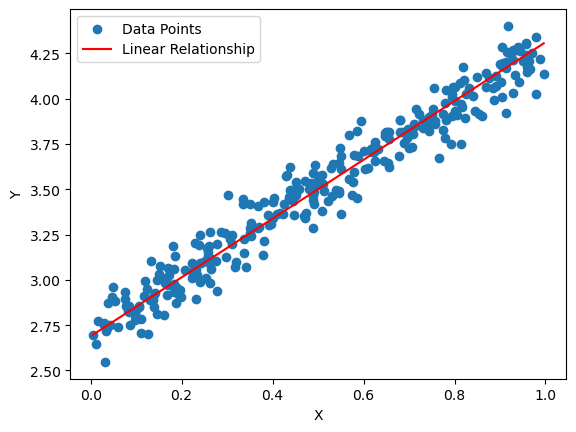

In [67]:
slope = first_pc[1] / first_pc[0]
intercept = n - slope * m

plt.scatter(X, Y, label='Data Points')

line_x = np.linspace(np.min(X), np.max(X), 100)
line_y = slope * line_x + intercept

plt.plot(line_x, line_y, color='red', label='Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()
